# PARTE 4.3. - MODELLING - XGBOOST

¿QUÉ FUNCIONA?
* n_estimators=5, max_depth=10, random_state=42
* SUBMUESTREO
* CAMBIO DE UMBRAL a 0.3 y 0.4, ¿no sé cuál funciona mejor? (DUDA TUTOR)


MEJOR OPCIÓN: 5 (DEL PDF COMPARATIVA)

## Importación librerías y lectura del DF

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Lectura DF
#df = pd.read_csv('/content/drive/MyDrive/MASTER_DATA_SCIENCE/Entregables & TFM/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/HEART_DISEASE_PREMODELLING.csv')
df = pd.read_csv("C:/Users/Juan/Downloads/HEART_DISEASE_PREMODELLING.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13308 entries, 0 to 13307
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HEIGHT                         13308 non-null  float64
 1   WAIST_CIRCUMFERENCE_LOG        13308 non-null  float64
 2   SYSTOLIC_MEAN_LOG              13308 non-null  float64
 3   DIASTOLIC_MEAN                 13308 non-null  float64
 4   PULSE_MEAN_LOG                 13308 non-null  float64
 5   ALBUMIN_URINE_LOG              13308 non-null  float64
 6   CREATININE_URINE_LOG           13308 non-null  float64
 7   HDL_LOG                        13308 non-null  float64
 8   TOTAL_CHOLE_LOG                13308 non-null  float64
 9   LYMPHOCYTE_LOG                 13308 non-null  float64
 10  MONOCYTE_LOG                   13308 non-null  float64
 11  SEGM_NEUTROPHILS_LOG           13308 non-null  float64
 12  EOSINOPHILS                    13308 non-null 

In [ ]:
df.shape

(13308, 66)

## TRAIN / TEST SPLIT

In [ ]:
# Separar las características (X) de la variable objetivo (y)
x = df.drop("HEART_DISEASE", axis=1)
y = df["HEART_DISEASE"]

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

corrs = [pearsonr(x.iloc[:, i], y)[0] for i in range(x.shape[1])]
# Seleccionar índices con |corr| ≥ 0.1 (por ejemplo)
idx_sel = [i for i, c in enumerate(corrs) if abs(c) >= 0.1]
# Use .iloc to select columns by integer position
X_reducido = x.iloc[:, idx_sel]

In [ ]:
X_reducido.shape

(13308, 18)

In [ ]:
y.shape

(13308,)

In [ ]:
# Seleccionamos muestra aleatoria
validation = int(len(df) * 0.2)
df_val = df.sample(n=validation, random_state=42)

In [ ]:
# Incluir el resto de los datos en el df_dev
df_dev = df.drop(df_val.index)

In [ ]:
# Comprobar que esten todas las filas
df_val.shape[0]+df_dev.shape[0]

13308

In [ ]:
df_val.shape[0]

2661

In [ ]:
df_dev.shape[0]

10647

In [ ]:
df_dev_x=df_dev.drop("HEART_DISEASE", axis=1)
df_dev_y=df_dev["HEART_DISEASE"]

In [ ]:
df_val_x=df_dev.drop("HEART_DISEASE", axis=1)
df_val_y=df_dev["HEART_DISEASE"]

In [ ]:
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_x, df_dev_y, test_size=0.30, random_state=42)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X_reducido, y, test_size=0.30, random_state=42)

In [ ]:
print("El número de columnas en el conjunto de entrenamiento es:", x_train.shape[1])
print("El número de columnas en el conjunto de prueba es:", x_test.shape[1])

El número de columnas en el conjunto de entrenamiento es: 18
El número de columnas en el conjunto de prueba es: 18


In [ ]:
y_train.describe().T.head()

count    9315.000000
mean        0.215674
std         0.411311
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

In [ ]:
y_test.describe().T.head()

count    3993.000000
mean        0.213874
std         0.410090
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

Como la media del target en test y train es la misma, la reparticion de las filas esta balanceada.

## Model definition: XGBOOST

### n_estimators=5, max_depth=5, random_state=42

In [ ]:
rf = XGBClassifier(n_estimators=5, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Model evaluation: XGBClassifier

### n_estimators=1000, max_depth=10, random_state=42

In [ ]:
rf= XGBClassifier(n_estimators=1000, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Model evaluation: XGBClassifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        1        1
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

3993

In [ ]:
results_rf['Success'].sum()

3081

In [ ]:
results_rf['Success'].mean()

0.7716003005259203

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3081 registros de un total de 3993, por tanto el Accuracy es 0.7716003005259203.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2888  251
1                         661  193

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7716003005259203

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.29738058551617874

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3139
           1       0.43      0.23      0.30       854

    accuracy                           0.77      3993
   macro avg       0.62      0.57      0.58      3993
weighted avg       0.73      0.77      0.74      3993



### n_estimators=500, max_depth=7, random_state=42

In [ ]:
rf= XGBClassifier(n_estimators=500, max_depth=7, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Model evaluation: XGBClassifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

3993

In [ ]:
results_rf['Success'].sum()

3072

In [ ]:
results_rf['Success'].mean()

0.7693463561232157

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3072 registros de un total de 3993, por tanto el Accuracy es 0.7693463561232157.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2875  264
1                         657  197

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7693463561232157

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.2996197718631179

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3139
           1       0.43      0.23      0.30       854

    accuracy                           0.77      3993
   macro avg       0.62      0.57      0.58      3993
weighted avg       0.73      0.77      0.74      3993



### n_estimators=100, max_depth=10, random_state=42

In [ ]:
rf= XGBClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Model evaluation: XGBClassifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

3993

In [ ]:
results_rf['Success'].sum()

3091

In [ ]:
results_rf['Success'].mean()

0.7741046831955923

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3091 registros de un total de 3993, por tanto el Accuracy es 0.7741046831955923.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2909  230
1                         672  182

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7741046831955923

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.287519747235387

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3139
           1       0.44      0.21      0.29       854

    accuracy                           0.77      3993
   macro avg       0.63      0.57      0.58      3993
weighted avg       0.73      0.77      0.74      3993



### SOBREMUESTREO

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_resampled:", x_train_resampled.shape)
print("Forma de y_train_resampled:", y_train_resampled.shape)

# Verificar la distribución de clases en el conjunto sobremuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_resampled:")
print(y_train_resampled.value_counts())

Forma de x_train original: (9315, 18)
Forma de y_train original: (9315,)
Forma de x_train_resampled: (14612, 18)
Forma de y_train_resampled: (14612,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_resampled:
HEART_DISEASE
0    7306
1    7306
Name: count, dtype: int64


##### n_estimators=5, max_depth=10, random_state=42 - EL QUE MÁS DETECTA

In [ ]:
rf= XGBClassifier(n_estimators=5, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

##### Model evaluation: XGBClassifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        1        1
399                         0                        1        0
6422                        0                        0        1
10435                       0                        1        0
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

3993

In [ ]:
results_rf['Success'].sum()

2873

In [ ]:
results_rf['Success'].mean()

0.7195091409967443

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 2873 registros de un total de 3993, por tanto el Accuracy es 0.7195091409967443.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2513  626
1                         494  360

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7195091409967443

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.391304347826087

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3139
           1       0.37      0.42      0.39       854

    accuracy                           0.72      3993
   macro avg       0.60      0.61      0.60      3993
weighted avg       0.74      0.72      0.73      3993



### SUBMUESTREO

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Crear el objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar submuestreo al conjunto de entrenamiento
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_undersampled:", x_train_undersampled.shape)
print("Forma de y_train_undersampled:", y_train_undersampled.shape)

# Verificar la distribución de clases en el conjunto submuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_undersampled:")
print(y_train_undersampled.value_counts())

Forma de x_train original: (9315, 18)
Forma de y_train original: (9315,)
Forma de x_train_undersampled: (4018, 18)
Forma de y_train_undersampled: (4018,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_undersampled:
HEART_DISEASE
0    2009
1    2009
Name: count, dtype: int64


##### n_estimators=1000, max_depth=10, random_state=42 - EL QUE MÁS DETECTA 67-67

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

rf= XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",
    #scale_pos_weight=ratio,
    subsample=0.7,
    max_depth=10,
    colsample_bytree=    0.7,
    colsample_bylevel=   0.7,
    colsample_bynode=    0.7,
    gamma=               1,
    min_child_weight=    3,
    reg_alpha=           1,
    reg_lambda=          5,
    max_delta_step=      1,
    booster=             "dart",
    learning_rate=0.1,
    use_label_encoder=False,
    n_estimators=1000
)

In [ ]:
rf.fit(x_train_undersampled, y_train_undersampled)

c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [20:06:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=0.7, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='aucpr', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=10, max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

##### Model evaluation: XGBClassifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        1        1
399                         0                        1        0
6422                        0                        0        1
10435                       0                        1        0
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

3993

In [ ]:
results_rf['Success'].sum()

2679

In [ ]:
results_rf['Success'].mean()

0.6709241172051089

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 2679 registros de un total de 3993, por tanto el Accuracy es 0.6709241172051089.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0     1
HEART_DISEASE_original             
0                        2107  1032
1                         282   572

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.6709241172051089

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.4654190398698128

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      3139
           1       0.36      0.67      0.47       854

    accuracy                           0.67      3993
   macro avg       0.62      0.67      0.61      3993
weighted avg       0.77      0.67      0.70      3993



##### TEST: CAMBIO DE UMBRAL (0.3) - Model evaluation: XGBClassifier

In [ ]:
y_proba = rf.predict_proba(x_test)[:, 1]

In [ ]:
umbral = 0.3
y_pred = (y_proba >= umbral).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1267 1872]
 [ 134  720]]
              precision    recall  f1-score   support

           0       0.90      0.40      0.56      3139
           1       0.28      0.84      0.42       854

    accuracy                           0.50      3993
   macro avg       0.59      0.62      0.49      3993
weighted avg       0.77      0.50      0.53      3993



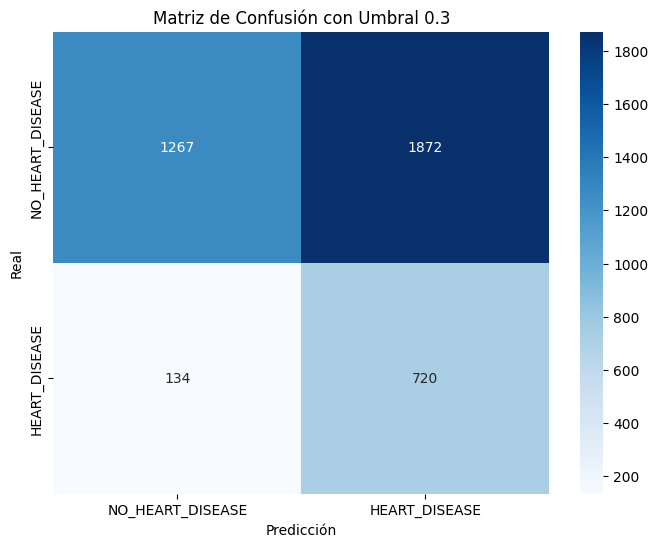

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'], yticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con Umbral ' + str(umbral))
plt.show()


##### TEST: CAMBIO DE UMBRAL (0.4) - Model evaluation: XGBClassifier MEJOR


In [ ]:
y_proba = rf.predict_proba(x_test)[:, 1]

In [ ]:
umbral = 0.4
y_pred = (y_proba >= umbral).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1719 1420]
 [ 205  649]]
              precision    recall  f1-score   support

           0       0.89      0.55      0.68      3139
           1       0.31      0.76      0.44       854

    accuracy                           0.59      3993
   macro avg       0.60      0.65      0.56      3993
weighted avg       0.77      0.59      0.63      3993



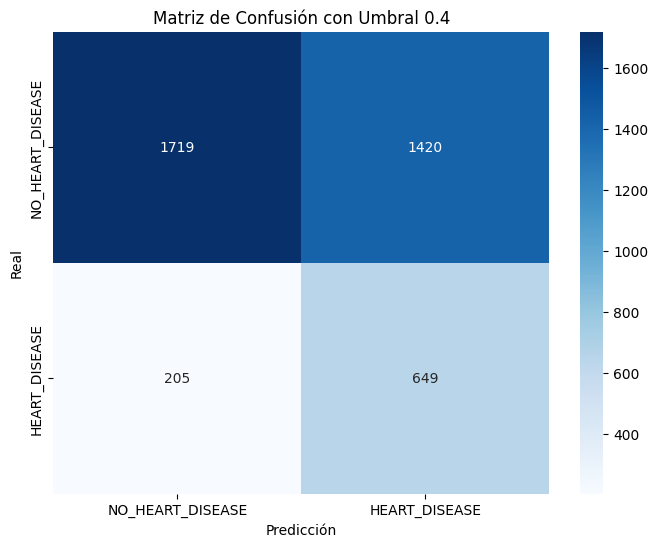

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'], yticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con Umbral ' + str(umbral))
plt.show()


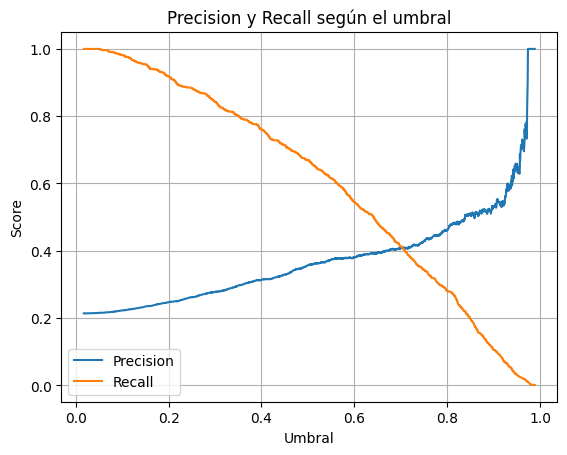

In [ ]:
from sklearn.metrics import precision_recall_curve

probas = rf.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probas)

import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Umbral')
plt.ylabel('Score')
plt.legend()
plt.title('Precision y Recall según el umbral')
plt.grid(True)
plt.show()

#### Ajustar desequilibrio de clases

In [ ]:
print(x_train.shape)
print(y_train.shape)

x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)

print(x_train_undersampled.shape)
print(y_train_undersampled.shape)

(9315, 18)
(9315,)
(4018, 18)
(4018,)


In [ ]:
# 1. Mostrar las columnas disponibles en tu DataFrame
print("Columnas en df:", df.columns.tolist())

# 2. Una vez sepas el nombre exacto de tu columna target, asigna:
target_column = 'HEART_DISEASE'  # p. ej. 'HasDetections', 'label', etc.

# 3. Crear X e y usando ese nombre
X = df.drop(target_column, axis=1)
y = df[target_column]


Columnas en df: ['HEIGHT', 'WAIST_CIRCUMFERENCE_LOG', 'SYSTOLIC_MEAN_LOG', 'DIASTOLIC_MEAN', 'PULSE_MEAN_LOG', 'ALBUMIN_URINE_LOG', 'CREATININE_URINE_LOG', 'HDL_LOG', 'TOTAL_CHOLE_LOG', 'LYMPHOCYTE_LOG', 'MONOCYTE_LOG', 'SEGM_NEUTROPHILS_LOG', 'EOSINOPHILS', 'RED_BLOOD_CELL', 'RED_CELL_DIST_LOG', 'PLATELET_LOG', 'COTININE_LOG', 'FERRITIN_LOG', 'FOLATE_LOG', 'FOLIC_ACID_LOG', 'FORMYL_TETRAHYDROFOLATE_LOG', 'TETRAHYDROFOLATE_LOG', 'MEFOX_OXIDATION_LOG', 'HEPA_ANTIBODY', 'HEPBS_ANTIBODY', 'HEPE_IGG', 'CREACTIVEPROTEIN_HS_LOG', 'BLOOD_INORGANICMERCURY_LOG', 'ETHYLMERCURY_BLOOD_LOG', 'METHYLMERCURY_BLOOD_LOG', 'PLOMO_SANGRE_LOG', 'CADMIO_SANGRE_LOG', 'SELENIO_SANGRE_LOG', 'MANGANESIO_SANGRE_LOG', 'ALBUMIN_BLOOD', 'ALKALINE_PHOSPHATASE_LOG', 'AST_GOT_LOG', 'BLOOD_UREA_NITROGEN_LOG', 'COMPLEMENT_C3', 'CALCIUM', 'CREATINE_KINASE_LOG', 'CREATININE_BLOOD_LOG', 'GGT_LOG', 'IRON_LOG', 'POTASSIUM_LOG', 'LACTATE_DEHYDROGENASE_LOG', 'OSMOLALITY', 'PHOSPHORUS_LOG', 'TOTAL_BILIRUBIN', 'TOTAL_PROTEIN', 

# MEJOR CASO

(10646, 65)
(2662, 65)
(10646,)
(2662,)
scale_pos_weight = 10.95

== Modelo 2 ==


c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [20:08:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.93      0.41      0.57      2089
           1       0.29      0.89      0.44       573

    accuracy                           0.51      2662
   macro avg       0.61      0.65      0.50      2662
weighted avg       0.79      0.51      0.54      2662

Confusion matrix:
 [[ 854 1235]
 [  63  510]]


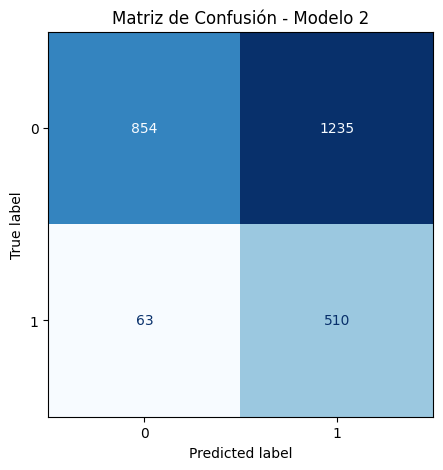

ROC AUC: 0.740


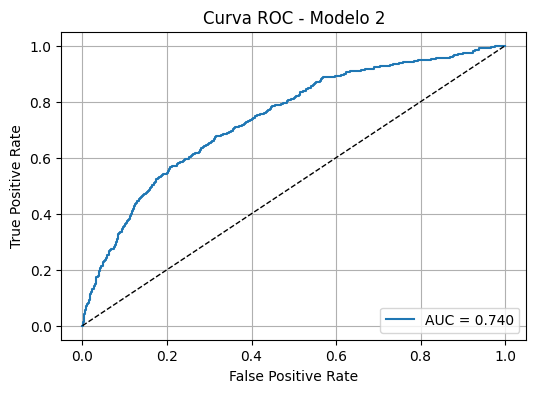

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import numpy as np, random

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)

# División entrenamiento/prueba (estratificada)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


# Scale_pos_weight
counter = Counter(y_train)
neg, pos = counter[0], counter[1]
ratio = neg/pos
factor = 3         # probamos cual va bien 1, 2, 3…
scale_pos_weight = ratio * factor
print(f"scale_pos_weight = {scale_pos_weight:.2f}")
'''
# 2) Definición de los dos modelos que quieres comparar
model1 = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='aucpr',
    random_state=42
)'''

model2 = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",
    subsample=0.8,
    max_depth=6,
    colsample_bytree=0.8,
    colsample_bylevel=0.7,
    colsample_bynode=0.7,
    gamma=1,
    min_child_weight=3,
    reg_alpha=1,
    reg_lambda=5,
    max_delta_step=1,
    booster="dart",
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    n_estimators=100,
    random_state=42
)

# 3) Pipeline SMOTETomek + model1 (o model2)

'''
pipeline1 = Pipeline([
    ('smt', SMOTETomek(random_state=42)),
    ('clf', model1)
])'''

pipeline2 = Pipeline([
    ('smt', SMOTETomek(random_state=42)),
    ('clf', model2)
])

# 4) Entrenamos y evaluamos el modelo
for name, pipe in [ ("Modelo 2", pipeline2)]: #("Modelo 1", pipeline1),
    print(f"\n== {name} ==")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred, digits=2))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(
        cm,
        index=["Actual 0", "Actual 1"],
        columns=["Pred 0", "Pred 1"]
    )

    # Matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(cmap="Blues", ax=ax, colorbar=False)
    ax.set_title(f"Matriz de Confusión - {name}")
    plt.show()

    # Curva ROC
    y_proba = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f"ROC AUC: {roc_auc:.3f}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


# Otras Pruebas

In [ ]:
import pandas as pd

# Comprueba que pipeline1 y pipeline2 estén entrenados
# pipeline1.fit(X_train, y_train)
# pipeline2.fit(X_train, y_train)
threshold = 0.49

for name, pipe in [("Modelo 2", pipeline2)]:#[("Modelo 1", pipeline1), ("Modelo 2", pipeline2)]:
    print(f"\n== {name} Probabilidades ==")
    # 1) Sacar probabilidades de la prueba
    probas = pipe.predict_proba(X_test)   # shape (n_samples, 2)
    # 2) Crear DataFrame con ellas
    df_probs = pd.DataFrame(
        probas,
        columns=['P(0)', 'P(1)'],
        index=X_test.index
    )
    # 3) Añadir la predicción dura y la etiqueta real
    df_probs['predicción'] = pipe.predict(X_test)
    df_probs['threshold'] = threshold
    df_probs['clasificado_con_umbral'] = np.where(df_probs['P(1)'] >= threshold, 1, 0)
    df_probs['real']        = y_test.values

    # 4) Mostrar las primeras 10 filas
    print(df_probs.head(10), "\n")

    # 5) Imprimir el reporte de clasificación y matriz de confusión
    print("=== Classification Report ===")
    print(classification_report(y_test, df_probs['clasificado_con_umbral'], digits=3))
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_test, df_probs['clasificado_con_umbral']))




== Modelo 2 Probabilidades ==
           P(0)      P(1)  predicción  threshold  clasificado_con_umbral  real
2754   0.519999  0.480001           0       0.49                       0     0
7172   0.625136  0.374864           0       0.49                       0     0
13103  0.722140  0.277860           0       0.49                       0     0
7600   0.287622  0.712378           1       0.49                       1     0
3554   0.528198  0.471803           0       0.49                       0     0
11111  0.338702  0.661298           1       0.49                       1     0
1067   0.556398  0.443602           0       0.49                       0     0
10805  0.571222  0.428778           0       0.49                       0     0
12459  0.713807  0.286193           0       0.49                       0     0
5302   0.466666  0.533334           1       0.49                       1     0 

=== Classification Report ===
              precision    recall  f1-score   support

           0 

In [ ]:
import pandas as pd
import numpy as np

# Define el umbral que quieres usar
threshold = 0.45

for name, pipe in [ ("Modelo 2", pipeline2)]:#("Modelo 1", pipeline1),
    print(f"\n== {name} Probabilidades con umbral {threshold:.2f} ==")
    # 1) Sacar probabilidades de la prueba
    probas = pipe.predict_proba(X_test)   # shape (n_samples, 2)

    # 2) Crear DataFrame con ellas
    df_probs = pd.DataFrame(
        probas,
        columns=['P(0)', 'P(1)'],
        index=X_test.index
    )

    # 3) Añadir columnas de umbral y clasificación según ese umbral
    df_probs['threshold'] = threshold
    df_probs['clasificado_con_umbral'] = np.where(df_probs['P(1)'] >= threshold, 1, 0)

    df_probs['real']        = y_test.values

    # 5) Mostrar las primeras 20 filas
    print(df_probs.head(20), "\n")



== Modelo 2 Probabilidades con umbral 0.45 ==
           P(0)      P(1)  threshold  clasificado_con_umbral  real
2754   0.519999  0.480001       0.45                       1     0
7172   0.625136  0.374864       0.45                       0     0
13103  0.722140  0.277860       0.45                       0     0
7600   0.287622  0.712378       0.45                       1     0
3554   0.528198  0.471803       0.45                       1     0
11111  0.338702  0.661298       0.45                       1     0
1067   0.556398  0.443602       0.45                       0     0
10805  0.571222  0.428778       0.45                       0     0
12459  0.713807  0.286193       0.45                       0     0
5302   0.466666  0.533334       0.45                       1     0
2685   0.247487  0.752513       0.45                       1     1
3958   0.908227  0.091773       0.45                       0     0
6857   0.203855  0.796145       0.45                       1     1
1319   0.326635

# *****************************************************************************

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

# División entrenamiento/prueba (estratificada)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Cálculo de scale_pos_weight
counter = Counter(y_train)
neg, pos = counter[0], counter[1]
ratio = neg/pos
factor = 3         # prueba 2, 3, 5…
scale_pos_weight = ratio * factor
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

# Definición y entrenamiento del modelo
model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='aucpr',
    random_state=42
)

model.fit(
    X_train, y_train,
    #early_stopping=10,
    eval_set=[(X_test, y_test)],
    verbose=True
)

import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# 1. Obtener las probabilidades de la clase positiva (1)
probas_1 = model.predict_proba(X_test)[:, 1]

# 2. Calcular precision, recall y umbrales
precision, recall, thresholds = precision_recall_curve(y_test, probas_1)

# 3. Calcular F1 para cada umbral
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # evito divid. por cero
best_idx = np.nanargmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Umbral óptimo: {best_threshold:.3f} → F1={f1_scores[best_idx]:.3f}")

# 4. Generar predicciones usando ese umbral
y_pred_thresh = (probas_1 >= best_threshold).astype(int)

# 5. Mostrar informe y matriz de confusión
print("\n=== Classification Report (umbral óptimo) ===")
print(classification_report(y_test, y_pred_thresh, digits=3))

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred_thresh)
print(cm)



scale_pos_weight = 10.95
[0]	validation_0-aucpr:0.37686
[1]	validation_0-aucpr:0.36517
[2]	validation_0-aucpr:0.38016
[3]	validation_0-aucpr:0.38109
[4]	validation_0-aucpr:0.38688
[5]	validation_0-aucpr:0.38711
[6]	validation_0-aucpr:0.38746
[7]	validation_0-aucpr:0.38825
[8]	validation_0-aucpr:0.39443
[9]	validation_0-aucpr:0.39935
[10]	validation_0-aucpr:0.40438
[11]	validation_0-aucpr:0.40912
[12]	validation_0-aucpr:0.40893
[13]	validation_0-aucpr:0.41445
[14]	validation_0-aucpr:0.41761
[15]	validation_0-aucpr:0.42187
[16]	validation_0-aucpr:0.42413
[17]	validation_0-aucpr:0.42813
[18]	validation_0-aucpr:0.42615
[19]	validation_0-aucpr:0.42464
[20]	validation_0-aucpr:0.42854
[21]	validation_0-aucpr:0.43178
[22]	validation_0-aucpr:0.43205
[23]	validation_0-aucpr:0.43475
[24]	validation_0-aucpr:0.43464
[25]	validation_0-aucpr:0.43591
[26]	validation_0-aucpr:0.43677
[27]	validation_0-aucpr:0.43778
[28]	validation_0-aucpr:0.43747
[29]	validation_0-aucpr:0.43509
[30]	validation_0-aucpr:0

c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[45]	validation_0-aucpr:0.44346
[46]	validation_0-aucpr:0.44406
[47]	validation_0-aucpr:0.44385
[48]	validation_0-aucpr:0.44523
[49]	validation_0-aucpr:0.44584
[50]	validation_0-aucpr:0.44710
[51]	validation_0-aucpr:0.44711
[52]	validation_0-aucpr:0.44828
[53]	validation_0-aucpr:0.44887
[54]	validation_0-aucpr:0.45097
[55]	validation_0-aucpr:0.44902
[56]	validation_0-aucpr:0.44972
[57]	validation_0-aucpr:0.44839
[58]	validation_0-aucpr:0.44763
[59]	validation_0-aucpr:0.44738
[60]	validation_0-aucpr:0.44799
[61]	validation_0-aucpr:0.44670
[62]	validation_0-aucpr:0.44424
[63]	validation_0-aucpr:0.44509
[64]	validation_0-aucpr:0.44409
[65]	validation_0-aucpr:0.44482
[66]	validation_0-aucpr:0.44366
[67]	validation_0-aucpr:0.44174
[68]	validation_0-aucpr:0.44182
[69]	validation_0-aucpr:0.44367
[70]	validation_0-aucpr:0.44351
[71]	validation_0-aucpr:0.43954
[72]	validation_0-aucpr:0.44184
[73]	validation_0-aucpr:0.44154
[74]	validation_0-aucpr:0.44264
[75]	validation_0-aucpr:0.44235
[76]	val

In [ ]:
x_train.shape
y_train.shape

(10646,)

### SMOTE

In [ ]:
# 1) Imports
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

# 2) Definir X e y (ajusta el nombre de tu target)
#arget_column = 'NOMBRE_DE_TU_TARGET'
X = df.drop(target_column, axis=1)
y = df[target_column]

# 3) Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 4) Calcular scale_pos_weight sobre el set de entrenamiento
counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

# 5) Construir pipeline SMOTETomek + XGBoost
pipeline = Pipeline([
    ('smt', SMOTETomek(random_state=42)),
    ('clf', XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='aucpr',
        random_state=42
    ))
])

# 6) Entrenar
pipeline.fit(X_train, y_train)

# 7) Evaluar
y_pred = pipeline.predict(X_test)
print("=== Classification Report con SMOTETomek ===")
print(classification_report(y_test, y_pred, digits=3))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


scale_pos_weight = 3.65


c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Classification Report con SMOTETomek ===
              precision    recall  f1-score   support

           0      0.864     0.811     0.837      2089
           1      0.438     0.536     0.482       573

    accuracy                          0.752      2662
   macro avg      0.651     0.674     0.659      2662
weighted avg      0.773     0.752     0.761      2662

=== Confusion Matrix ===
[[1695  394]
 [ 266  307]]


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# 1) Sacar las probabilidades de la clase positiva (1)
probas_1 = pipeline.predict_proba(X_test)[:, 1]

# 2) Calcular precision, recall y thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probas_1)

# 3) Calcular F1 para cada umbral
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.nanargmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Umbral óptimo SMOTETomek: {best_threshold:.3f} → F1={f1_scores[best_idx]:.3f}")

# 4) Predecir con ese umbral
y_pred_thresh = (probas_1 >= best_threshold).astype(int)

# 5) Evaluar de nuevo
print("\n=== Classification Report (umbral SMOTETomek) ===")
print(classification_report(y_test, y_pred_thresh, digits=3))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_thresh))


Umbral óptimo SMOTETomek: 0.454 → F1=0.489

=== Classification Report (umbral SMOTETomek) ===
              precision    recall  f1-score   support

           0      0.873     0.776     0.822      2089
           1      0.419     0.588     0.489       573

    accuracy                          0.736      2662
   macro avg      0.646     0.682     0.655      2662
weighted avg      0.775     0.736     0.750      2662

=== Confusion Matrix ===
[[1621  468]
 [ 236  337]]


### SMOTETomek + XGBoost

In [ ]:
from collections import Counter
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from scipy.stats import randint, uniform

# 1) Definir X e y (ajusta el nombre de tu target)
#target_column = 'NOMBRE_DE_TU_TARGET'
X = df.drop(target_column, axis=1)
y = df[target_column]

# 2) Cálculo de scale_pos_weight
counter = Counter(y)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos

# 3) Construir pipeline
pipeline = Pipeline([
    ('smt', SMOTETomek(random_state=42)),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='aucpr',
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ))
])

# 4) Definir espacio de búsqueda
param_dist = {
    'clf__n_estimators': randint(100, 1000),
    'clf__max_depth': randint(3, 10),
    'clf__learning_rate': uniform(0.01, 0.2),
    'clf__subsample': uniform(0.6, 0.4),
    'clf__colsample_bytree': uniform(0.6, 0.4),
    'clf__gamma': uniform(0, 5),
    'clf__reg_alpha': uniform(0, 1),
    'clf__reg_lambda': uniform(0, 1),
}

# 5) RandomizedSearchCV con validación estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rs = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,                   # prueba 30 combinaciones
    scoring='f1',                # optimizamos F1 de la clase 1
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 6) Ejecutar búsqueda
rs.fit(X, y)

# 7) Mostrar resultados
print("Mejores parámetros encontrados:")
print(rs.best_params_)
print(f"Mejor F1 media en CV: {rs.best_score_:.3f}")

# 8) Evaluación final sobre un split de test (opcional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
best_model = rs.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\n=== Classification Report (test) ===")
print(classification_report(y_test, y_pred, digits=3))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros encontrados:
{'clf__colsample_bytree': 0.8042989210310263, 'clf__gamma': 2.087055015743895, 'clf__learning_rate': 0.05442156209414605, 'clf__max_depth': 5, 'clf__n_estimators': 333, 'clf__reg_alpha': 0.33761517140362796, 'clf__reg_lambda': 0.9429097039125192, 'clf__subsample': 0.7292811728083021}
Mejor F1 media en CV: 0.471


c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Classification Report (test) ===
              precision    recall  f1-score   support

           0      0.874     0.753     0.809      2089
           1      0.403     0.606     0.484       573

    accuracy                          0.722      2662
   macro avg      0.638     0.680     0.647      2662
weighted avg      0.773     0.722     0.739      2662

=== Confusion Matrix ===
[[1574  515]
 [ 226  347]]


### Ensemble balanceado con BalancedRandomForest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1) Definir X e y
#target_column = 'NOMBRE_DE_TU_TARGET'
X = df.drop(target_column, axis=1)
y = df[target_column]

# 2) Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Entrenar BalancedRandomForest
brf = BalancedRandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
brf.fit(X_train, y_train)

# 4) Evaluar
y_pred = brf.predict(X_test)
print("=== Classification Report BalancedRF ===")
print(classification_report(y_test, y_pred, digits=3))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Juan\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `F

=== Classification Report BalancedRF ===
              precision    recall  f1-score   support

           0      0.891     0.658     0.757      2089
           1      0.362     0.707     0.479       573

    accuracy                          0.669      2662
   macro avg      0.627     0.683     0.618      2662
weighted avg      0.777     0.669     0.697      2662

=== Confusion Matrix ===
[[1375  714]
 [ 168  405]]


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# 1) Obtener probabilidades de clase 1
probas_1 = brf.predict_proba(X_test)[:, 1]

# 2) Calcular precision, recall y thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probas_1)

# 3) Calcular F1 para cada umbral y elegir el óptimo
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.nanargmax(f1_scores)
best_thresh = thresholds[best_idx]
print(f"Umbral óptimo BalancedRF: {best_thresh:.3f} → F1={f1_scores[best_idx]:.3f}")

# 4) Predecir con ese umbral
y_pred_thresh = (probas_1 >= best_thresh).astype(int)

# 5) Evaluar de nuevo
print("\n=== Classification Report (umbral óptimo BalancedRF) ===")
print(classification_report(y_test, y_pred_thresh, digits=3))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_thresh))


Umbral óptimo BalancedRF: 0.555 → F1=0.500

=== Classification Report (umbral óptimo BalancedRF) ===
              precision    recall  f1-score   support

           0      0.880     0.763     0.817      2089
           1      0.418     0.621     0.500       573

    accuracy                          0.732      2662
   macro avg      0.649     0.692     0.658      2662
weighted avg      0.781     0.732     0.749      2662

=== Confusion Matrix ===
[[1593  496]
 [ 217  356]]


### stacking  BalancedRF + umbral + XGBOOT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np

# 1) Prepara X, y y split
#target_column = 'NOMBRE_DE_TU_TARGET'
X = df.drop(target_column, axis=1)
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2) Define los dos modelos base
brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
xgb = XGBClassifier(
    n_estimators=rs.best_params_['clf__n_estimators'],
    max_depth=rs.best_params_['clf__max_depth'],
    learning_rate=rs.best_params_['clf__learning_rate'],
    subsample=rs.best_params_['clf__subsample'],
    colsample_bytree=rs.best_params_['clf__colsample_bytree'],
    gamma=rs.best_params_['clf__gamma'],
    reg_alpha=rs.best_params_['clf__reg_alpha'],
    reg_lambda=rs.best_params_['clf__reg_lambda'],
    scale_pos_weight=neg/pos,
    use_label_encoder=False,
    eval_metric='aucpr',
    random_state=42
)

# 3) Crea el StackingClassifier
stack = StackingClassifier(
    estimators=[('brf', brf), ('xgb', xgb)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# 4) Entrena
stack.fit(X_train, y_train)

# 5) Busca el umbral óptimo en el test
probas = stack.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probas)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.nanargmax(f1_scores)
best_thresh = thresholds[best_idx]
print(f"Umbral óptimo Stacking: {best_thresh:.3f} → F1={f1_scores[best_idx]:.3f}")

# 6) Evalúa con ese umbral
y_pred = (probas >= best_thresh).astype(int)
print("\n=== Classification Report (Stacking) ===")
print(classification_report(y_test, y_pred, digits=3))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


Umbral óptimo Stacking: 0.263 → F1=0.513

=== Classification Report (Stacking) ===
              precision    recall  f1-score   support

           0      0.883     0.778     0.827      2089
           1      0.435     0.623     0.513       573

    accuracy                          0.745      2662
   macro avg      0.659     0.701     0.670      2662
weighted avg      0.786     0.745     0.760      2662

=== Confusion Matrix ===
[[1626  463]
 [ 216  357]]
